In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm


### read data 

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
test_id = test['Id']
df = train

In [8]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [10]:
train = df

In [11]:
print(f"Number of rows and number of columns in the train dataset are {train.shape[0]} and {train.shape[1]}")
print(f"Number of rows and number of columns in the test dataset are {test.shape[0]} and {test.shape[1]}")

Number of rows and number of columns in the train dataset are 1460 and 80
Number of rows and number of columns in the test dataset are 1459 and 79


## There is 1 column less in the test dataset because we need to predict the price of the houses for the test dataset

# now we Analysis the SalePrice Feature 

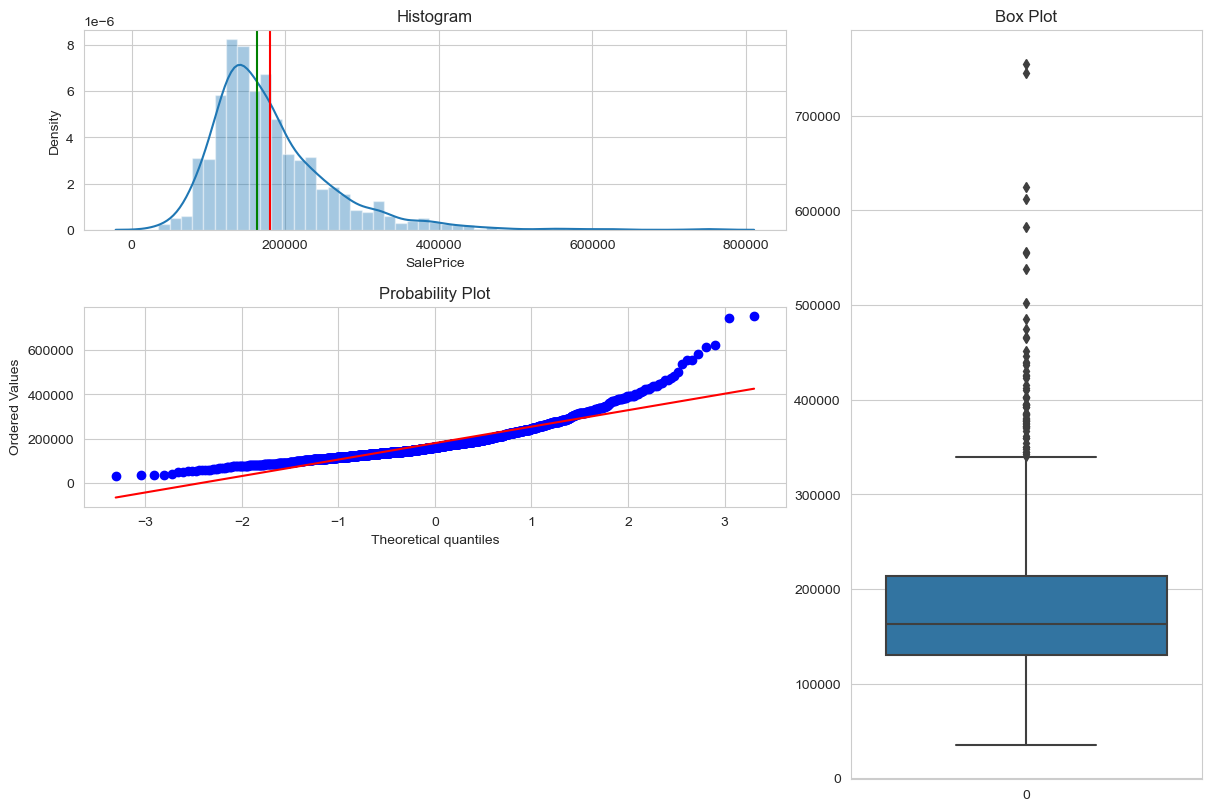

In [14]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)
 ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(df, 'SalePrice')


   ## Red line in histogram indicates the mean of the SalePrice and the Green line indicates the median

### From the above plots, we can observe that the Sales Price is not normally distributed. From the boxplot we can observe that the dataset have a number of outliers.

### For the probability plot, the red line represents those points which would have been plotted for y-axis points if those were normally distributed. But the blue points represents the actual scenario. We can see that there is a lot of deviation on the both the ends i.e on the top right and bottom left.

In [17]:
#Skewness means Measure of the asymmetry of a distribution
from scipy.stats import skew
print("Skewness of the SalesPrice is", df['SalePrice'].skew())

Skewness of the SalesPrice is 1.8828757597682129


#### Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution.

#### Here we can observe that the value of skewness is quite high which means that there is a large amount of asymmetry.

#### The peak of the histogram represents the mode i.e the price for which maximum number of houses were sold.

#### What kind of skewness is present in the given case?

#### As the mean of the feature is greater than the median which is greater than the mode and the line is flat towards the right in the histogram, the given feature is Positively Skewed. Most of the houses were sold less than the average price.

## There is an amazing library called missingno which helps us to visualize the number of Null values present in each feature.

<Axes: >

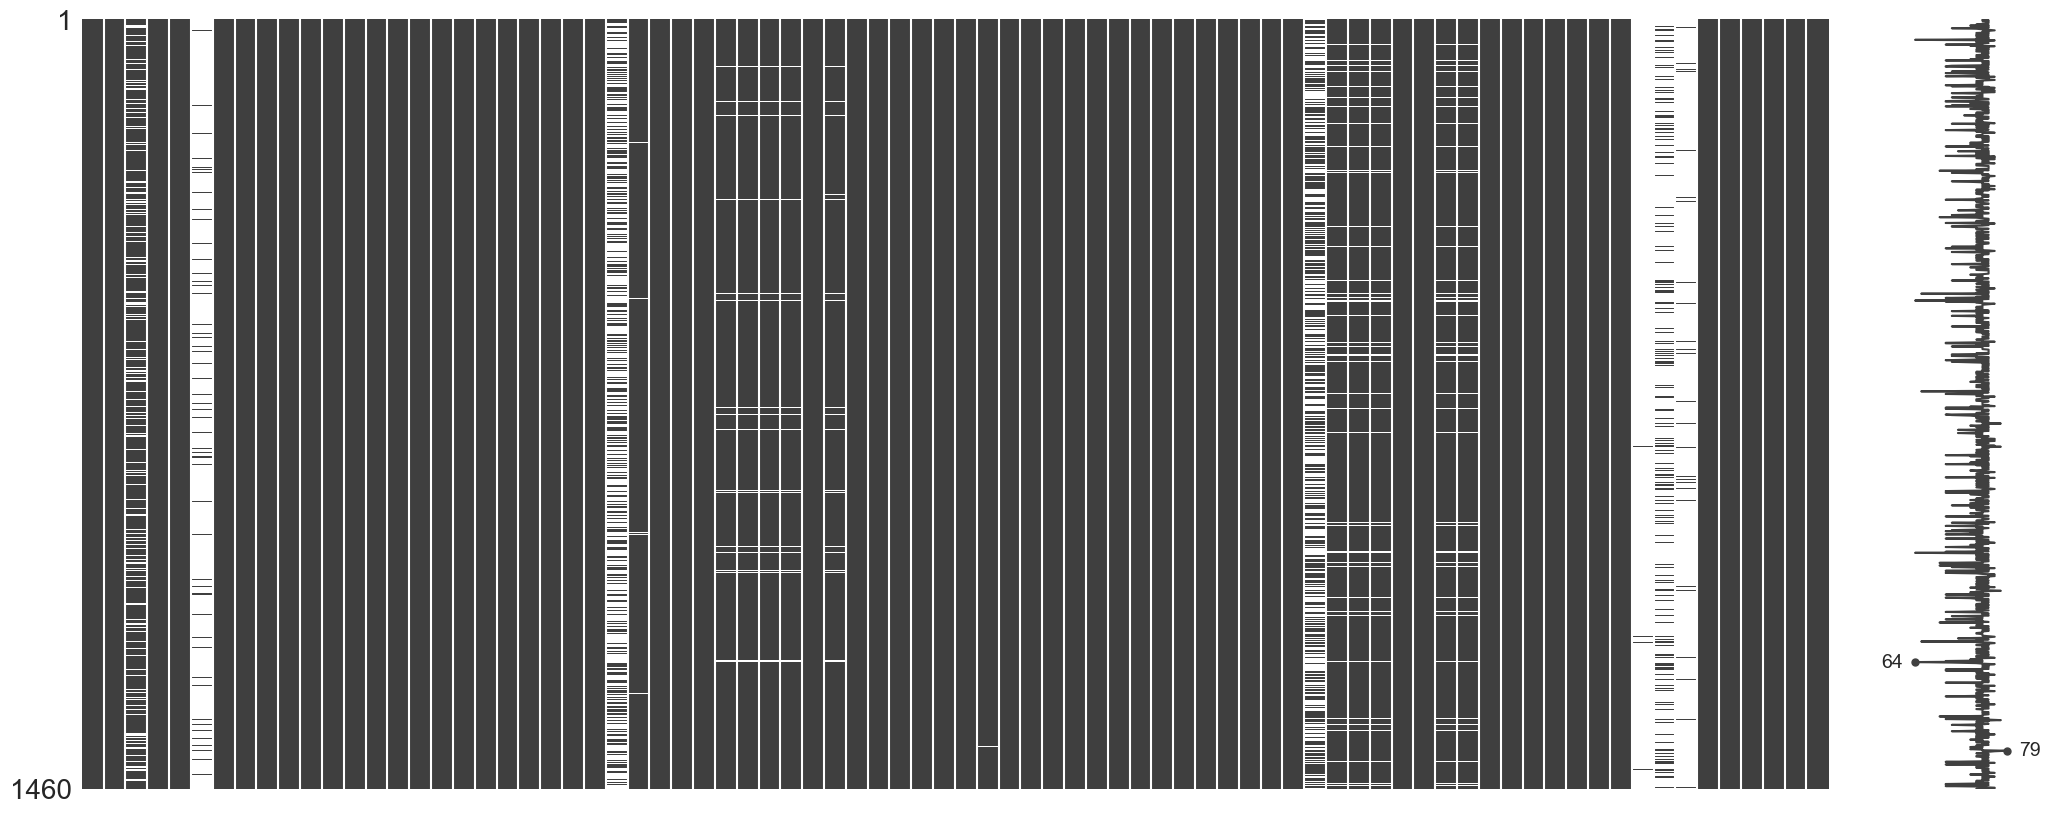

In [20]:
!pip install missingno
import missingno as msno
%matplotlib inline
msno.matrix(train)

<Axes: >

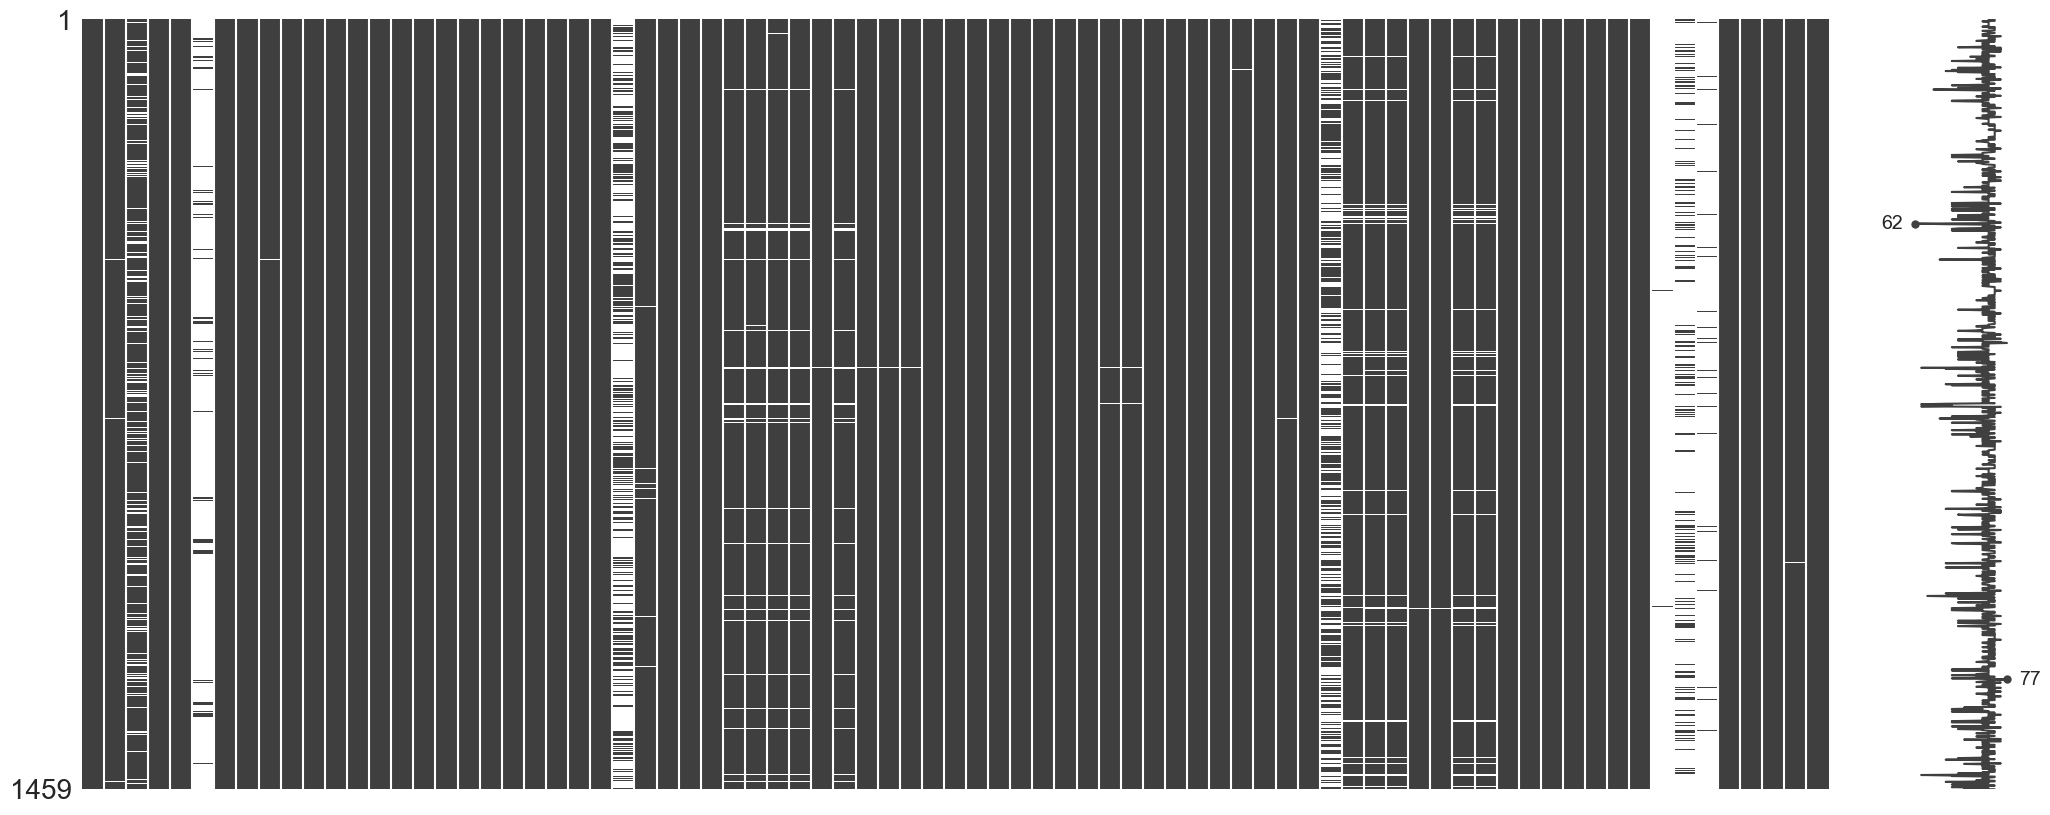

In [21]:
msno.matrix(test)

In [22]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame

In [23]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
59,GarageFinish,81,5.547945
63,GarageCond,81,5.547945
57,GarageType,81,5.547945
2,LotFrontage,259,17.739726
56,FireplaceQu,690,47.260274
24,MasVnrType,872,59.726027
72,Fence,1179,80.753425
5,Alley,1369,93.767123
73,MiscFeature,1406,96.301370
71,PoolQC,1453,99.520548


In [24]:
null_frame_test = null_table(test)
null_frame_test.sort_values(by = 'Approximate Percentage of Null Values').tail(10)

,Columns,Count of Null Values,Approximate Percentage of Null Values
59,GarageFinish,78,5.346127
58,GarageYrBlt,78,5.346127
63,GarageCond,78,5.346127
2,LotFrontage,227,15.558602
56,FireplaceQu,730,50.034270
24,MasVnrType,894,61.274846
72,Fence,1169,80.123372
5,Alley,1352,92.666210
73,MiscFeature,1408,96.504455
71,PoolQC,1456,99.794380


#### We must observe here that NA has a different meaning. Here we can not impute or remove those rows having NA. For example if one of the values for Alley is NA, it means that home has no Alley or if the value of GarageType is NA it means that particular home has no Garage. That's why we need to take into account these values as it can affect the final prices of the house.

#### Let's combine both the train and test dataset and analyze the null values

In [27]:
na = train.shape[0]
nb = test.shape[0]
y_train = train['SalePrice'].to_frame()
# Combine train and test sets
total = pd.concat((train, test), sort = False).reset_index(drop = True)
# Drop the target "SalePrice" and Id columns
total.drop(['SalePrice'], axis = 1, inplace = True)
print(f"Total size is {total.shape}")

Total size is (2919, 79)


In [28]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

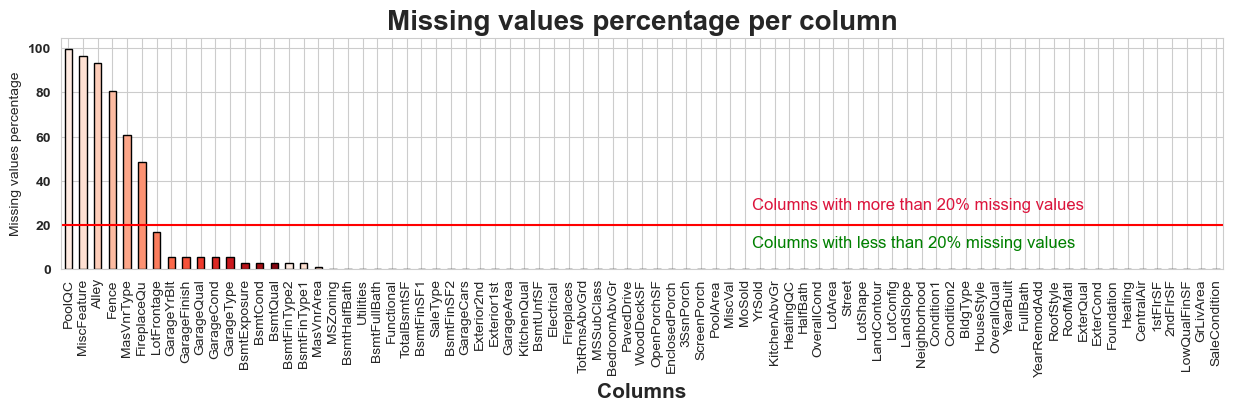

In [29]:
msv_1(total, 20, color=sns.color_palette('Reds',15))

#### There are 5 columns having more than 20 percent null values. We will deal with these values later.
## Numerical and Categorical Variables¶
#### Exploring Numerical Variables

In [31]:
category_var = df.select_dtypes(include = 'object')
num_var = df.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  43
Number of numerical features are:  37


### Before moving forward let's see the correlation of the numerical features with the target variable

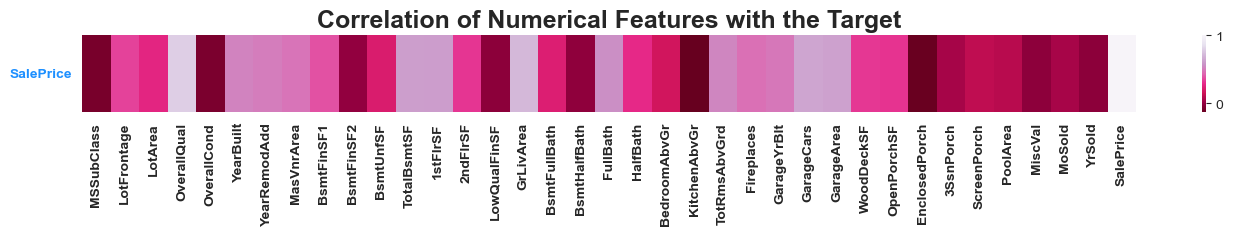

In [33]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by = ['SalePrice'], ascending = False).head(1), cmap='PuRd_r')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

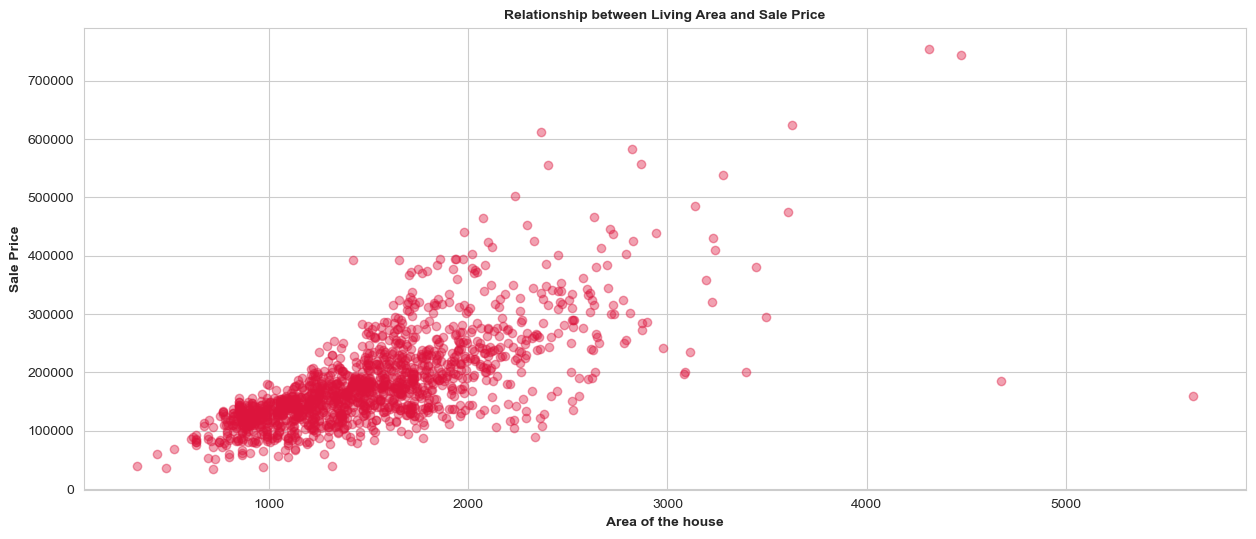

In [34]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### We can observe that there is almost a linear relationship between Living Area and the Sale Price. If the area is huge then price should also have also been high but the two rightmost points suggest something else. These two points are outliers. We will drop both of them below.

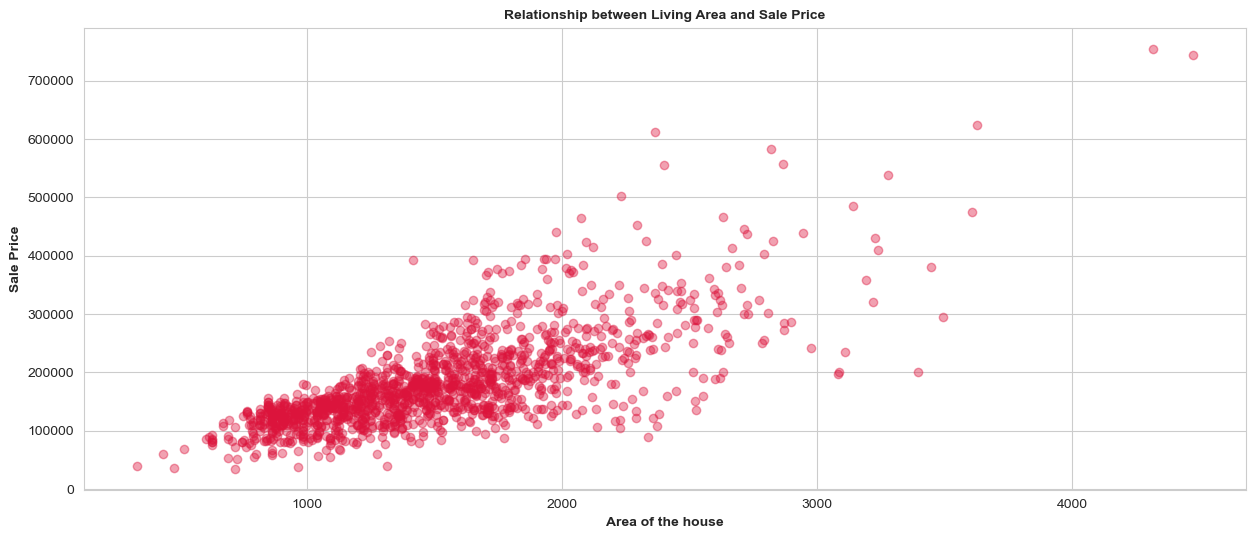

In [36]:
train = train[train['GrLivArea'] < 4500]
previous_train = df
df = train
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

#### We can observe that those two values have been successfully dropped.

## Garage Area


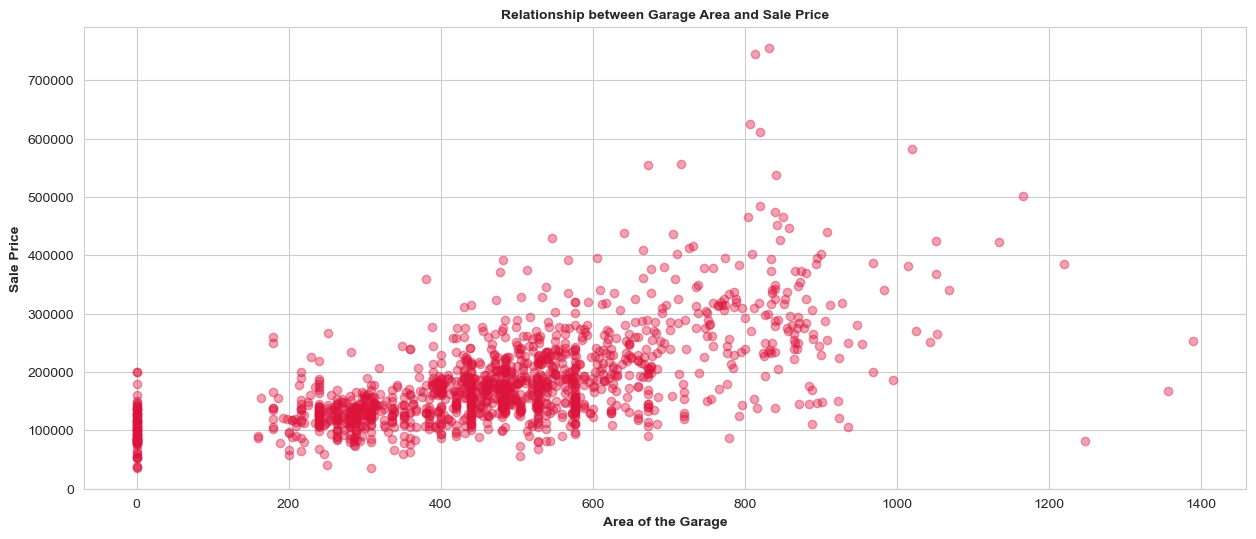

In [38]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = df, color='crimson', alpha=0.4)
plt.title('Relationship between Garage Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the Garage', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()






## Total Basement Area





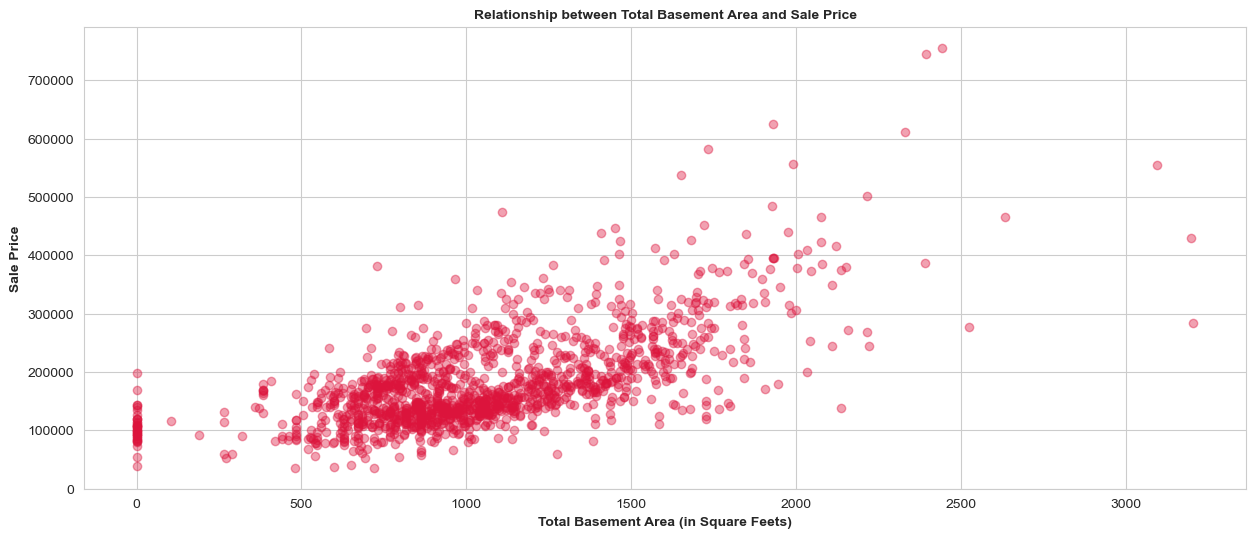

In [40]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df, color = 'crimson', alpha = 0.4)
plt.title('Relationship between Total Basement Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Total Basement Area (in Square Feets)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

## 1st Floor Area


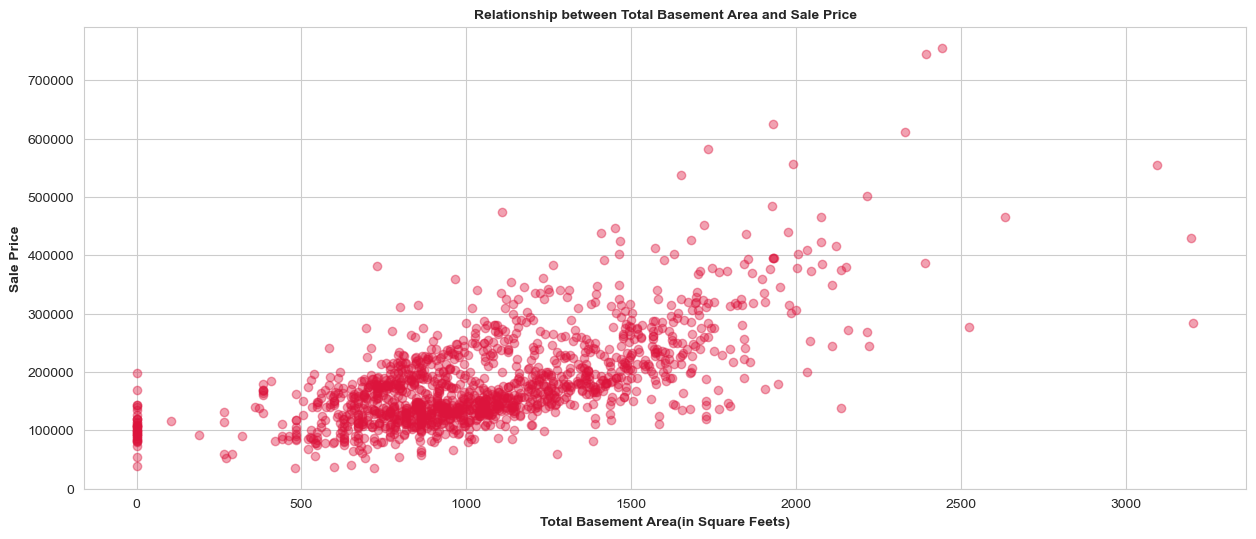

In [42]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df, color = 'crimson', alpha = 0.4)
plt.title('Relationship between Total Basement Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Total Basement Area(in Square Feets)', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()


### Before we move forward we need to understand the assumptions of linear regression:

### Linearity
### Homoscedasticity
### No or little Multicollinearity
### Independence of Error
### Since we fit a linear model, we assume that the relationship is linear, and the errors, or residuals, are pure random fluctuations around the true line. We expect that the variability in the dependent variable doesn't increase as the value of the independent increases, which is the assumptions of equal variance, also known as Homoscedasticity. We also assume that the observations are independent of one another(No Multicollinearity), and a correlation between sequential observations or auto-correlation is not there.

### Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.

### In order to discover the linearity let's plot scatter plots for GrLivArea and MasVnrArea

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

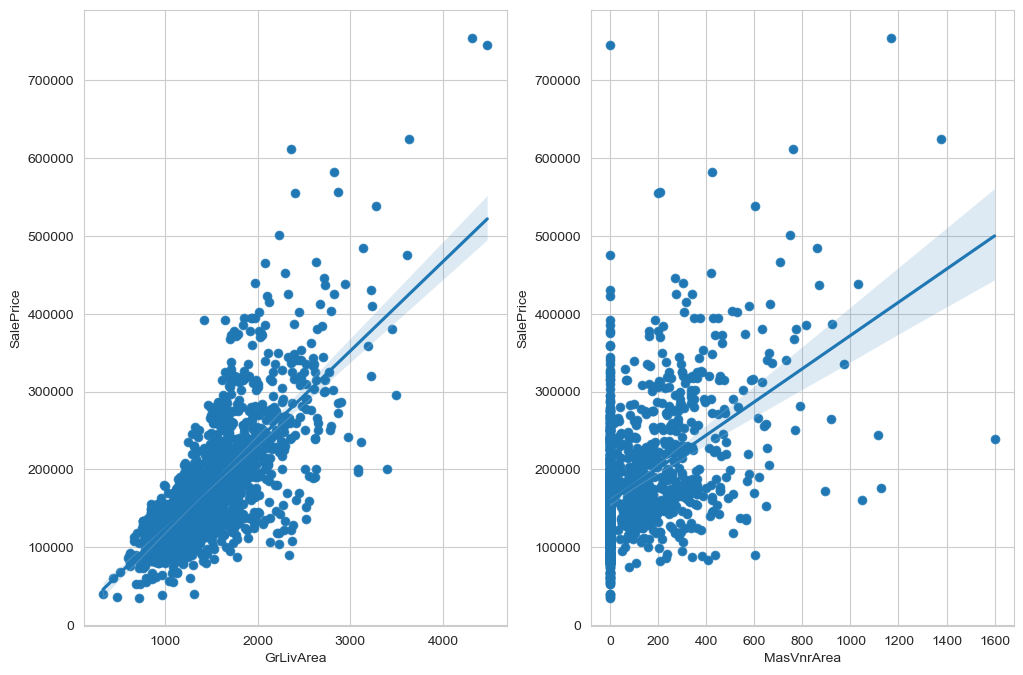

In [44]:
## Scatter plotting for SalePrice and GrLivArea.
fig, (ax1, ax2) = plt.subplots(figsize = (12, 8), ncols = 2,sharey = False)
 
sns.scatterplot(x = df['GrLivArea'], y = df['SalePrice'],  ax = ax1)
## Putting a regression line. 
sns.regplot(x = df['GrLivArea'], y = df['SalePrice'], ax = ax1)

sns.scatterplot(x = df['MasVnrArea'],y = df['SalePrice'], ax = ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x = df['MasVnrArea'], y = df['SalePrice'], ax=ax2)

### We can observe that the relationship between Sales Price and GrLivArea is much more linear than the relationship between Sales Price and MasVnrArea.

### Let's look at the residual plot for independent variable GrLivArea and our target variable SalePrice.

### A residual value is a measure of how much a regression line vertically misses a data point. Regression lines are the best fit of a set of data. You can think of the lines as averages; a few data points will fit the line and others will miss. A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

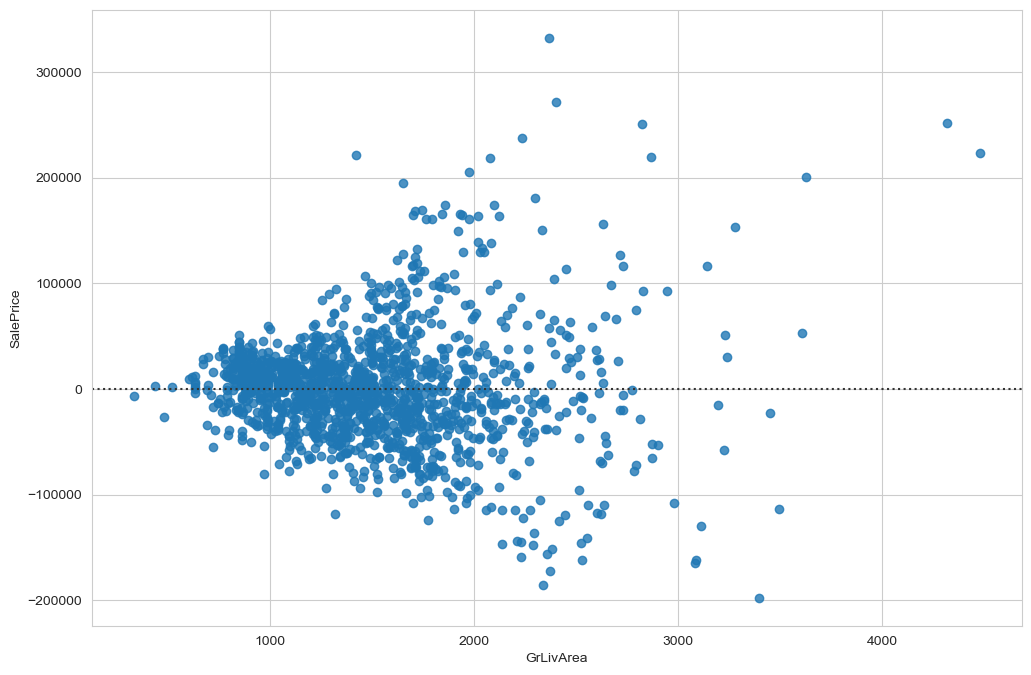

In [46]:

plt.subplots(figsize=(12,8))
sns.residplot(data=df, x='GrLivArea', y='SalePrice')

### Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points. Even though it seems like there is a linear relationship between the response variable and predictor variable, the residual plot looks more like a funnel.

### The error plot shows that as GrLivArea value increases, the variance also increases, which is the characteristics known as Heteroscedasticity. The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed.

### Let's plot the three graphs again for the target feature.

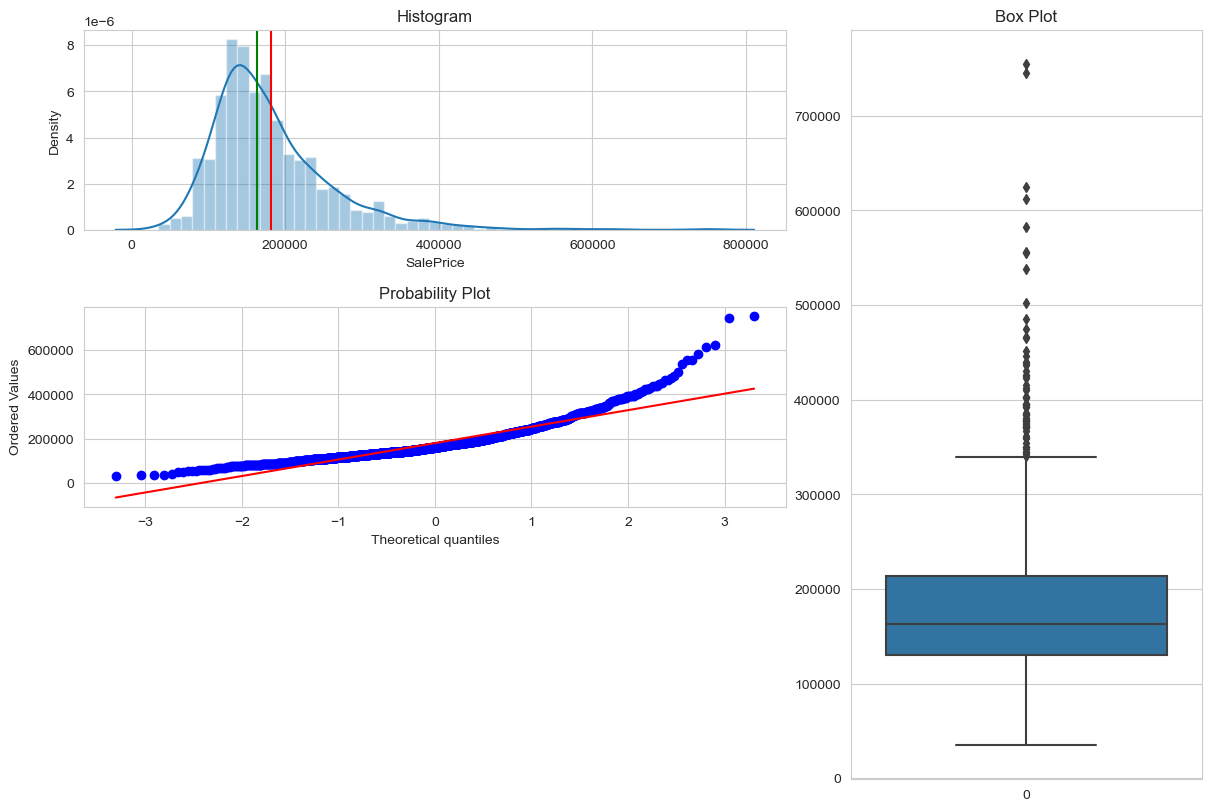

In [48]:
three_chart_plot(df, 'SalePrice')

### Now let's make sure that the target variable follows a normal distribution. In order to make a feature follow normal distribution, we will perform log transformation.

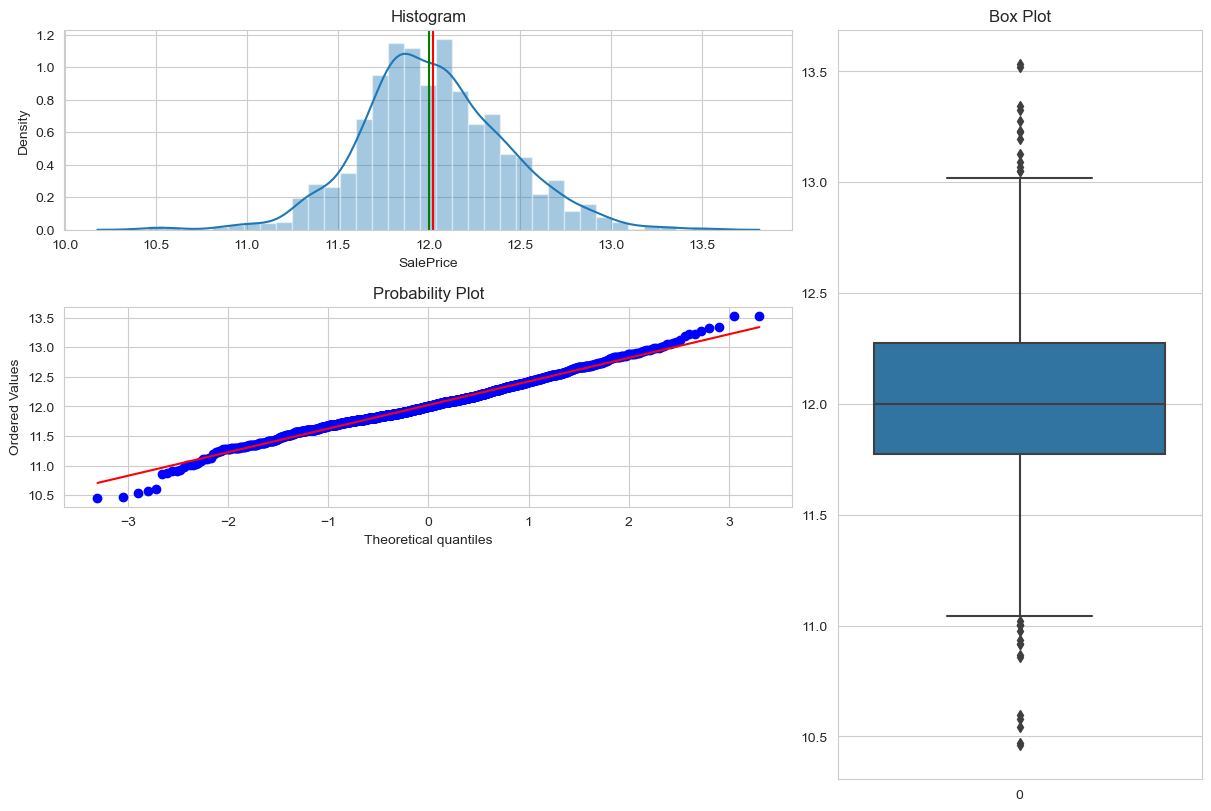

In [50]:
train["SalePrice"] = np.log1p(train["SalePrice"])
df = train
three_chart_plot(df, 'SalePrice')

### We can observe that the SalesPrice feature now follows a normal distibution as the Histogram resembles bell-shape and the QQ-plot also overlaps with the red line. Let's again plot the scatter plot for GrLivArea and SalePrice to see whether Heteroscedasticity was removed.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

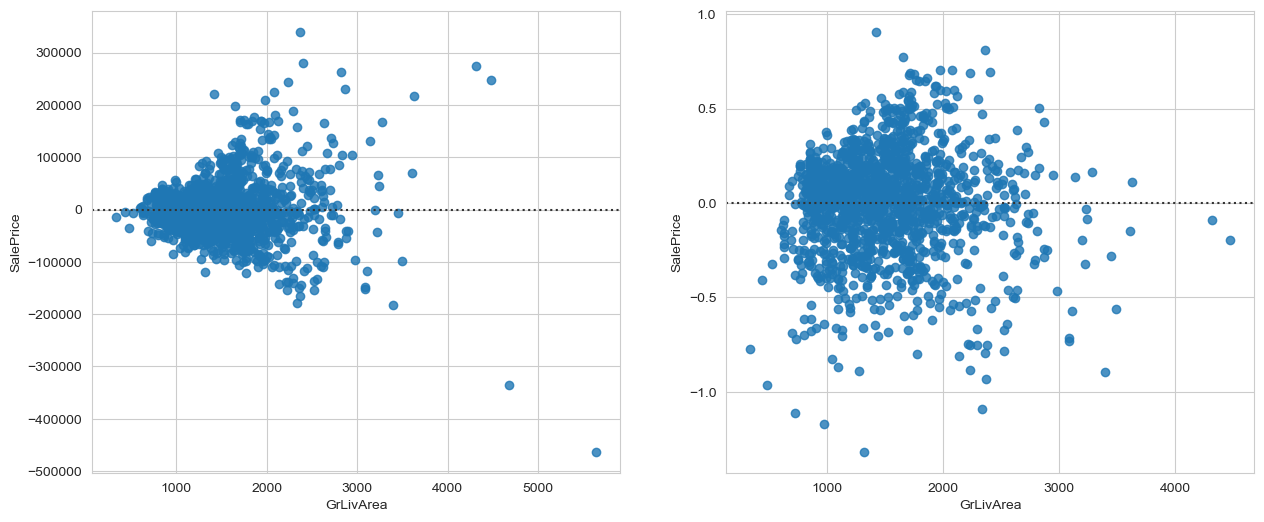

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols=2, sharey=False, sharex=False)
sns.residplot(x='GrLivArea', y='SalePrice', data=previous_train, ax=ax1)
sns.residplot(x='GrLivArea', y='SalePrice', data=df, ax=ax2)


#### We can see that the scatterplot on the left had heteroscedasticity(funnel like shape) but after applying log transformation to the feature, it was removed and now it's Homoscedastic.

#### Linear Regression indicates significant relationships between the dependent variable and the independent variable. It assumes that there is a linear relationship between the independent variables and the dependent variable but this is not always the case in real life. There are very less scenarios where this assumption holds true. Multiple Regression also suffers from multi-collinearity, auto-correlation, and heteroskedasticity.

#### The interpretation of the linear coefficient is that it represents the mean change in the dependent variable for 1 unit change in the independent variable when all the other independent variables are held constant.

#### Now suppose that there are two correlated independent variables (A and B) and we are aiming to find the right coefficient for these independent variables. When the coefficient for A is calculated, will that coefficient be accurate? No, it won’t be right because changes in A are associated with shifts in B, and as we have already discussed that all the other variables need to be held constant, B can’t be held as a constant because A and B are correlated. This is known as Multicollinearity and it is one of the disadvantages of Linear Regression.

#### In order to solve this problem, we use various regularization techniques (l1, l2 etc) or other kind of regression techniuques like Elastic Net Regression, Lasso and Ridge Regression which automatically takes care of multicollinearity.

<Figure size 1500x1000 with 0 Axes>

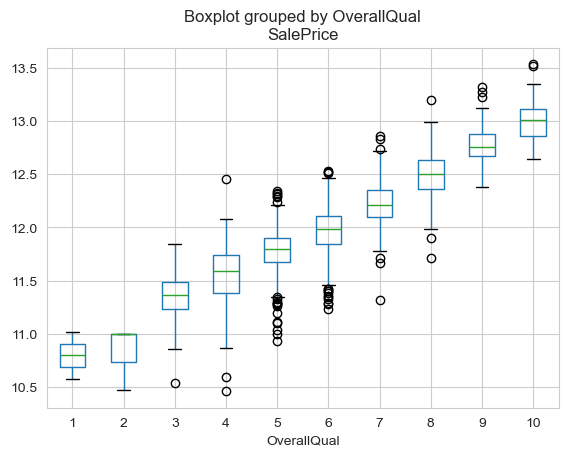

In [54]:
plt.figure(figsize = ((15, 10)))
df.boxplot(by = 'OverallQual', column = 'SalePrice')
plt.show()

#### As the quality increases, price of the houses also increase



## Exploring Categorical Variables

In [56]:
def horizontal_plot(data, column_name, color, plot_title):
    
    """
    A function that plots a horizontal bar graph for the given column name
    """
    
    fig, ax = plt.subplots(figsize = (9, 6))
    
    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()

    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor = 'black', color =
                sns.color_palette(color, len(title_cnt)))

    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add x,y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values 
    ax.invert_yaxis()

    ax.set_title(plot_title,weight='bold',loc='center', pad=10, fontsize=16)
    
    ax.set_xlabel('Count', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round((i.get_width()), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

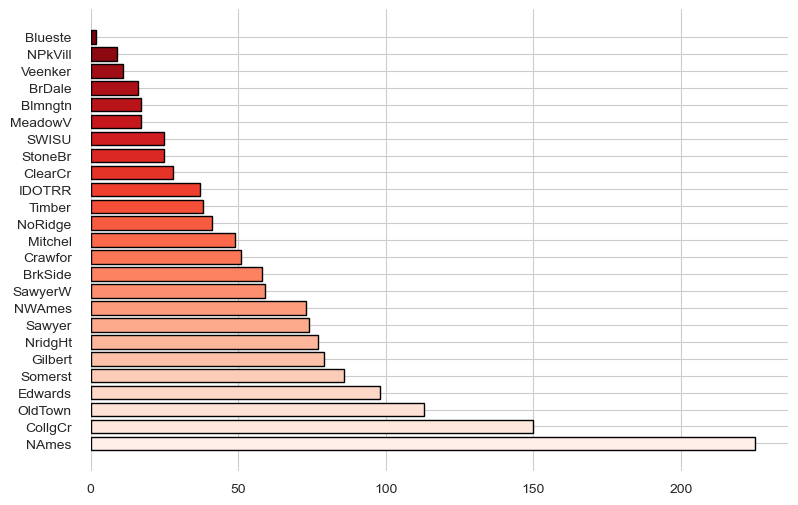

In [57]:
horizontal_plot(df, 'Neighborhood', 'Reds', 'Most frequent neighborhoods')

In [ ]:
horizontal_plot(df, 'BldgType', 'Greens', 'Building type: Type of dwelling')

In [ ]:
horizontal_plot(df, 'GarageType', 'terrain', 'Garage Type')

### First let's combine the train and test features.

In [ ]:
y = df['SalePrice'].reset_index(drop = True)
train_features = df.drop('SalePrice', axis = 1)
test_features = test.copy()

features = pd.concat((train_features, test_features)).reset_index(drop = True)

In [ ]:
features.shape

#### Some of the variables given in the description should be of string data type but instead they are stored as numerical data type. First let's change them into string data type

In [ ]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['MoSold'] = features['MoSold'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)

In [ ]:
three_chart_plot(df, 'SalePrice')

In [ ]:
null_table(features).sort_values(by = 'Approximate Percentage of Null Values').tail(10)

In [ ]:
msv_1(features, 80, color = sns.color_palette('Reds',15))

#### We can see that there are 4 features having more than 80% missing values. We will drop these 4 features.



In [ ]:
features = features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)
features.shape

In [ ]:
msv_1(features, 80, color = sns.color_palette('Reds',15))

### Now none of the features have above 80% missing values.

 ### We must observe here that NA has a different meaning. Here we can not impute or remove those rows having NA. For example if one of the values for Alley is NA, it means that home has no Alley or if the value of GarageType is NA it means that particular home has no Garage. That's why wee need to take into account these values as it can affect the final prices of the house.

### I have identified some of the features which have NA as a category, they are listed in form of a list below. We will replace these null values with None.

### Reading through the description of the features is very important, otherwise the above points can't be concluded.

In [ ]:
description = open("data_description.txt", "r")
print(description.read())

In [ ]:
def filling_null(features):
    
    # In the description for 'Functional Feature', it is given that Typ refers to the Typical Functionality
    # We will replace null values in the 'Functional' feature with 'Typ'
    
    features['Functional'] = features['Functional'].fillna('Typ')
    
    # Replace the null values in the below columns with their mode. We are replacing with mode because
    # all of these features are categorical variable, we can't take the mean nor the median.
    
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])

    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    
    # In order to fill the null values for MSZoing, we will take into account the MSSubClass featue.
    # We are doing so because the type of dwelling in a given area largely affects the zone of the area.
    
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # In order to fill the null values for LotFrontage(Linear feet of street connected to property) 
    # we will fill it with median of the values grouped by Neighborhood.
    
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    # As mentioned before that the 'NA' value in many columns represent the absence of that feature for
    # a particular house, we will replace those null values with None.
    # 'None' for categorical feature and 0 for numerical feature.
    
    cat_features = features.select_dtypes(include = 'object').columns
    num_features = features.select_dtypes(exclude = 'object').columns
    
    features[cat_features] = features[cat_features].fillna('None')
    features[num_features] = features[num_features].fillna(0)
        
    return features

In [ ]:
features = filling_null(features)
features.shape

In [ ]:
features.isnull().sum().sum()

#### Now there are 0 null values in the given dataset

#### Now let's create some new features.

## Feature Creation

In [ ]:
def new_features(features):
    
    features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x : 1 if x > 0 else 0)
    features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    # Adding total sqfootage features 
    # In order to get the total area of the house we have to add the basement area, 1st floor area and 2nd floor area.
    
    features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
    
    # Total number of bathrooms = number of full bathrooms + 0.5 * number of half bathrooms
    # + number of bathrooms in basement + 0.5 * number of half bathrooms in the basement.
    
    features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                                   features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
    
    features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                                  features['EnclosedPorch'] + features['ScreenPorch'])

    # Add years since remodel
    features['YearsSinceRemodel'] = features['YrSold'].astype(int) - features['YearRemodAdd'].astype(int)

    return features

In [ ]:
features = new_features(features)
features.shape

### Let's analyse the skewness of the numerical features.

In [ ]:
num_features = features.select_dtypes(exclude = 'object').columns

skewed_features = features[num_features].apply(lambda x : x.skew()).sort_values(ascending = False)
skew_features = pd.DataFrame({'Skew Value' : skewed_features})

skew_features.head(10)

### There's is quite a lot of asymmetry in the above features. We will need to fix the skewness

In [ ]:
def fix_skew(features):
    
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the data that are not of "object" type. 
    numerical_columns = features.select_dtypes(exclude = 'object').columns

    # Check the skew of all numerical features
    skewed_features = features[numerical_columns].apply(lambda x: x.skew()).sort_values(ascending=False)
    
    high_skew = skewed_features[abs(skewed_features) > 0.5]
    skewed_features = high_skew.index

    # Perform the Box-Cox transformation
    for column in skewed_features:
        features[column] = boxcox1p(features[column], boxcox_normmax(features[column] + 1))
        
    return features

In [ ]:
import pandas as pd
from scipy.stats import skew

# Sample function to fix skewness in all numeric features
def fix_skew(df):
    # Apply log transformation for all numeric features with skewness > 0.5
    numeric_feats = df.dtypes[df.dtypes != "object"].index
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewness = pd.DataFrame({'Skew': skewed_feats})
    skewness = skewness[abs(skewness) > 0.5]
    
    for feat in skewness.index:
        df[feat] = np.log1p(df[feat])
    return df

# Assuming 'features' is your dataframe
features = fix_skew(features)
print(features.head())


In [ ]:
features = pd.get_dummies(features).reset_index(drop=True)
features.shape

In [ ]:
X = features.iloc[:len(y), :]
test = features.iloc[len(y):, :]

In [ ]:
X.shape, test.shape, y.shape

# Training and Testing Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    if train == True:
        pred = model.predict(x_train_std)
        
        print("Train Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        
    print()
    
    if train == False:
        pred = model.predict(x_test)
        
        print("Test Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.1)
ls.fit(X_train, y_train)

evaluation(ls, X_train, y_train, X_test, y_test, True)
evaluation(ls, X_train, y_train, X_test, y_test, False)

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

evaluation(ridge, X_train, y_train, X_test, y_test, True)
evaluation(ridge, X_train, y_train, X_test, y_test, False)

# XGB Regressor

In [ ]:
!pip install xgboost

import xgboost as xgb
xgb_regress = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)
xgb_regress.fit(X_train, y_train)

evaluation(xgb_regress, X_train, y_train, X_test, y_test, True)
evaluation(xgb_regress, X_train, y_train, X_test, y_test, False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
training_rmse = 0.2736141889007717
training_mse = 0.07486472436782718
training_mae = 0.20296924385209011

test_rmse = 0.29191808413254544
test_mse = 0.08521616784361588
test_mae = 0.2196656944816468

# Create a table for training and test set metrics
fig, ax = plt.subplots(figsize=(8, 4))

metrics = ['RMSE', 'MSE', 'MAE']
training_values = [training_rmse, training_mse, training_mae]
test_values = [test_rmse, test_mse, test_mae]

bar_width = 0.35
index = np.arange(len(metrics))

bar1 = ax.bar(index, training_values, bar_width, label='Training Set')
bar2 = ax.bar(index + bar_width, test_values, bar_width, label='Test Set')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics between Training and Test Sets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

# Print the metrics in a formatted table
print('\nTraining Set Metrics:')
print(f'RMSE: {training_rmse}')
print(f'MSE: {training_mse}')
print(f'MAE: {training_mae}')

print('\nTest Set Metrics:')
print(f'RMSE: {test_rmse}')
print(f'MSE: {test_mse}')
print(f'MAE: {test_mae}')
